In [1]:
import pandas as pd
import numpy as np
import os
import seaborn

In [18]:
path = "../data/"
reward_prefix = "wholesale_reward.csv"
action_prefix = "wholeale_action.csv"

In [19]:
df = pd.read_csv(os.path.join(path+prefix))

In [22]:
df_reward_rolling = df["reward"].rolling(50).mean().dropna()

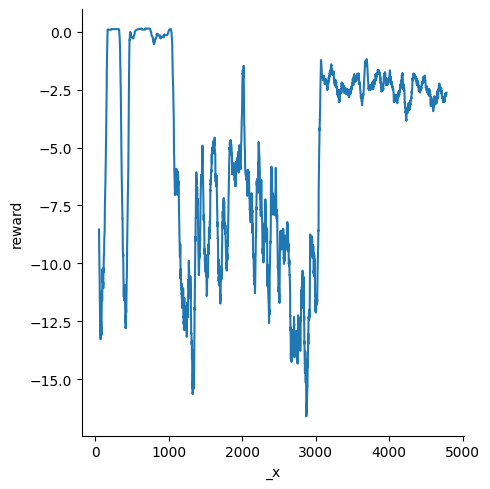

In [23]:
seaborn.relplot(x=df_reward_rolling.index, y=df_reward_rolling,kind="line")